# MACHINE LEARNING CLASSIFICATION ALGORITHMS ON A BREAST CANCER DATA SET 


<img src="Breast cancer.jpg">

# Introduction

Breast cancer is one of the most common cancers, accounting for many fatalities each year. Breast cancer accounts for approximately one-third of all cancer diagnoses in the US. Breast cancer is caused by an abnormal growth of cells in the breast tissue. Breast cancer tumors are classified as benign (non-cancerous), pre-malignant (cancerous), or malignant (cancerous). Breast cancer screening is crucial in the early stages of cancer disease. Classification of data into two types of breast cancer is an efficient tool for studying breast cancer, especially in healthcare, where classification is the most common method applied in diagnosis and decision-making. The main goal of this project is to evaluate the integrity of data classification for each algorithm's evaluation metrics in terms of accuracy, precision, sensitivity, and specificity. I used powerful algorithms to categorize the data, including logistic regression, QDA (Quadratic Discriminant Analysis), K-NN (K-Nearest Neighbor), Artificial Neural Network, SVM, and decision tree. The main question investigated is whether these machine learning algorithms are useful in detecting tumor cell types. As per the findings, classification aids in the detection of the proper kinds of tumor cells.

# Problem and motivation

There are numerous challenges with a cancer diagnosis despite a significant number of medical studies and technological breakthroughs that contribute to cancer treatment. Breast cancer is a leading cause of death in women.  An increase in nuclear radiation, chemicals in the air, bacteria, fungi, electromagnetic radiation, viruses, parasites, heat, water, food, mechanical cell-level injury, free radicals, evolution, and aging of DNA and RNA could all cause normal cells to transform into cancer cells through a metamorphosis or alteration of DNA or RNA. Therefore, it is crucial to diagnose breast cancer cells appropriately. Most breast tumors are formed by benign (non-cancerous) modifications, whereas misdiagnosing a malignant tumor as benign might result in severe consequences. The motivation behind this final project is to determine if malignancies should be reasonably classified as B (benign) or M (malignant). The goal is to create a reliable classification algorithm that will drastically reduce the incidence of breast cancer.

# Data Description

   The project is based on the Wisconsin (Diagnostic) Breast Cancer Data Set. I previously used the UCI machine learning repository for several projects and appreciate their commitment to delivering a quality data set. The final project aims to study data from women in Wisconsin to determine whether breast cancer is malignant or benign. The original data set consists of [569*32] dimension, where 32 are the features, and they were computed by a digitized image of a fine needle aspirate (FNA) of a breast mass. They exhibit characteristics of the cell nuclei seen in the imaging. I chose diagnosis as a target variable, and it has two classes: M (malignant) and B (benign). Following that, I generated a factor variable with M (Malignant = 1) and B (Benign = 0) tumor types. Increased values of features including radius worst, texture worst, parameter worst, area worst, smoothness worst, compactness worst, concavity worst, concave point worst, symmetry worst, and fractal dimension worst all lead to the M (Malignant). I decided to split the breast cancer data set into train and test sets with 70 to 30 percent data size. I will use the same subset of the train and test datasets for all algorithms in the whole project.

# Data Preprocessing

I did not experience any trouble with the cleaning part, but I had problems with the formatting of some feature variables’ titles in the original dataset. To rememdy this, I fixed the title of the two features, such as“cancave_points_mean” and “ cancave_points_worst,” and I removed the space between the words to avoid any future issues. Although there was an unuseful column in the original data set, such as patient ID, I decided to eliminate the first column. Then, I left with 31 columns and a data set consist of [569*31] dimensions. I also verified the NA and Null values. As a result, I obtained zero NA values in the new data set.

# Data Source

The data source used in this project is UCI machine learning repository. The URL of the dataset is below:

[UCI Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

# Load all of the essential libraries.

In [1]:
# Import all of the essential libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn import metrics
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import warnings


# Dataset Loaded into Jupyter Notebook Utilizing a csv File:

In [2]:
# Create a data frame called bc.
bc = pd.read_csv("BC.csv")
bc.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
# Show the dimensions of the bc dataset.
bc.shape

(569, 33)

In [4]:
# To show information about each variable data type, use the info() function.
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# To examine the mean, standard deviation, min, 25th percentile, 50th percentile, 75th percentile, 
# and max values, use the describe and transpose () functions.
bc.describe().transpose()

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

# Feature Engineering

Using feature engineering, outliers, na values, and null values were discovered in the dataset. To increase the model's performance, data cleaning was performed.

In [6]:
# Use the drop() function to remove non-essential features from the dataset.
new_bc = bc.drop(['Unnamed: 32','id'],  axis = 1)

# Use a head() function to extract the first five rows of the datset.
new_bc.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [7]:
# Use a print() function to print the shape of original and transfomed dataset.
print('The old shape of a breast cancer dataset is {}'.format(bc.shape),".")
print('The new shape of a breast cancer dataset is {}'.format(new_bc.shape),".")

The old shape of a breast cancer dataset is (569, 33) .
The new shape of a breast cancer dataset is (569, 31) .


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

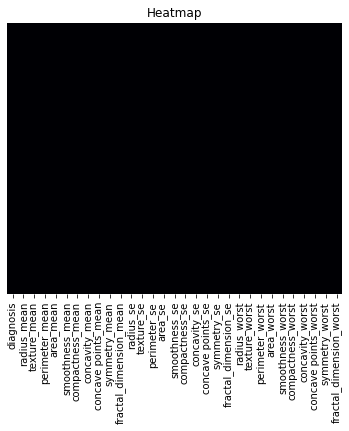

In [8]:
# Look for null values in the data set. Display the null values on the heatmap if any.
plt.figure(figsize = (6,5))
sns.heatmap(new_bc.isnull(),yticklabels  = False, cbar = False, cmap = 'magma')
plt.title('Heatmap')
new_bc.isnull().sum()

There are no null values in the dataset, as can be seen in heatmap above.

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

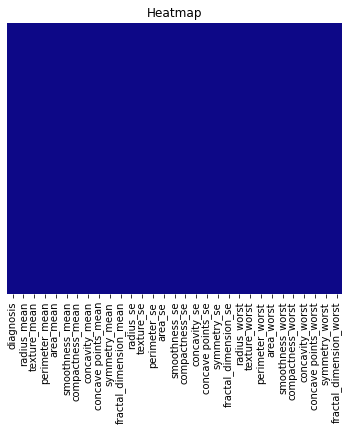

In [9]:
# Look for na values in the data set. Display the na values on the heatmap if any.
plt.figure(figsize = (6,5))
sns.heatmap(new_bc.isna(),yticklabels  = False, cbar = False, cmap = 'plasma')
plt.title('Heatmap')
new_bc.isna().sum()

There are no na values in the dataset, as can be seen in heatmap above.

In [10]:
# Create a factor variable which consists of two levels 1 represents M (cancerous cell) and 0 represents B (Noncancerous cell) tumor cells.
new_bc = pd.get_dummies(data=new_bc, columns= ['diagnosis'], drop_first= True)

In [11]:
# Use a head() function to extract the first five rows of a new bc dataset.
new_bc.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis_M  
0          0.4601                  0.11890            1  
1          0.2750                  0.08902            1  
2          0.3613                  0.08758            1  
3          0.6638                  0.17300            1  
4          0.2364                  0.07678            1  

[5 rows x 31 columns]

In [12]:
# To rename the column name, use the rename() function.
new_bc.rename(columns={'diagnosis_M': 'diagnosis' }, inplace=True)
new_bc.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 31 columns]

In [13]:
# Show the counts of the target variable.
print(bc['diagnosis'].value_counts())
print('\n')
print(new_bc['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


0    357
1    212
Name: diagnosis, dtype: int64


In [14]:
# Create a function called without outliers() that detects non-outliers using an Interquartile (IQR) approach. 
# It returns a list of non-outliers.
def without_Outliers(new_bc):
    Q1 = new_bc.quantile(0.25)
    Q3 = new_bc.quantile(0.75)
    IQR = Q3 - Q1
    non_outliers = ~((new_bc < (Q1 - 1.5 * IQR)) |(new_bc > (Q3 + 1.5 * IQR)))
    return non_outliers

# Create a function called with outliers() that detects outliers using an Interquartile (IQR) approach. 
# It returns a list of outliers.
def with_Outliers(new_bc):
    Q1 = new_bc.quantile(0.25)
    Q3 = new_bc.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((new_bc < (Q1 - 1.5 * IQR)) |(new_bc > (Q3 + 1.5 * IQR)))
    return outliers


In [15]:
# To obtain the non-outliers dataset subset, use a newly built function without outliers.
new_bc_subset = without_Outliers(new_bc)

# Checking outliers in all the columns of the dataset.
new_bc = new_bc[new_bc_subset.all(1)]

# To print all of the nan values, use the print and isnan functions().
print(np.isnan(new_bc).sum())
print('\n')
print('The original shape of the bc dataset {}'.format(bc.shape))
print('The new shape of the bc dataset {}'.format(new_bc.shape))

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64


The original shape of the bc dataset (569, 33)
The new shape of the bc dataset (398, 3

After removing the extreme outliers from the original dataset, 398 observations and 31 features were obtained.

Text(0.5, 1.0, 'Observations without extreme Outliers')

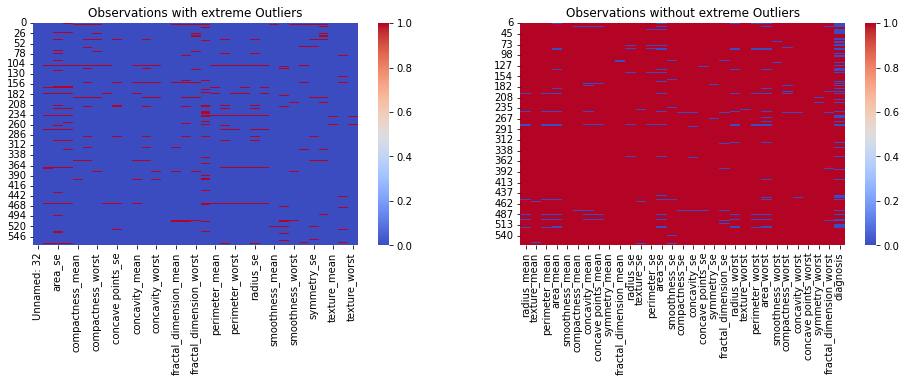

In [16]:
# Use the filterwarnings() function to ignore the warning.
warnings.filterwarnings('ignore')

# To display outliers on a heatmap, use the sns.heatmap() function.
plt.figure(figsize = (16,9))

# Figure 1
plt.subplot(2,2,1)
nn1 = with_Outliers(bc)
sns.heatmap(nn1, cmap = 'coolwarm')
plt.title("Observations with extreme Outliers")

# Figure 2
plt.subplot(2,2,2)
nn2 = without_Outliers(new_bc)
sns.heatmap(nn2, cmap = 'coolwarm')
plt.title("Observations without extreme Outliers")

The heatmaps appropriately depicted the original dataset's extreme outliers. On the other hand, the right-hand heatmap displayed no extreme outliers.

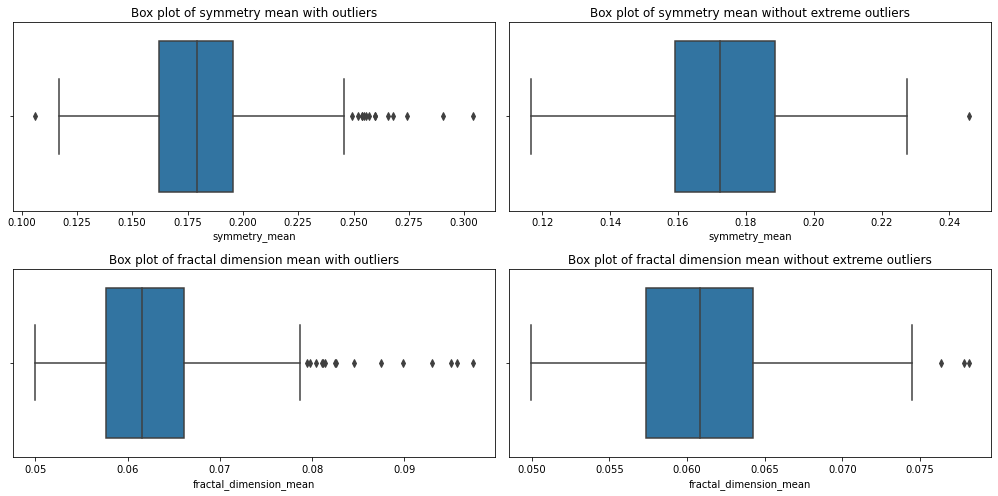

In [17]:
# Show boxplots
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x = 'symmetry_mean', data = bc)
plt.title("Box plot of symmetry mean with outliers")

plt.subplot(2,2,2)
sns.boxplot(x = 'symmetry_mean', data = new_bc)
plt.title("Box plot of symmetry mean without extreme outliers")

plt.subplot(2,2,3)
sns.boxplot(x = 'fractal_dimension_mean',data = bc)
plt.title("Box plot of fractal dimension mean with outliers")

plt.subplot(2,2,4)
sns.boxplot(x = 'fractal_dimension_mean', data = new_bc)
plt.title("Box plot of fractal dimension mean without extreme outliers")
plt.tight_layout()

The extreme outliers have been removed from the dataset, as shown in the box plots above. As a result, it can assist in improving the performance of machine learning models.

# Exploratory data analysis (EDA)

I used advanced visualization frameworks like seaborn, matplotlib, plotly, cufflinks, and plotlyexpress to investigate the data. This section provides an overview of the dataset's features.

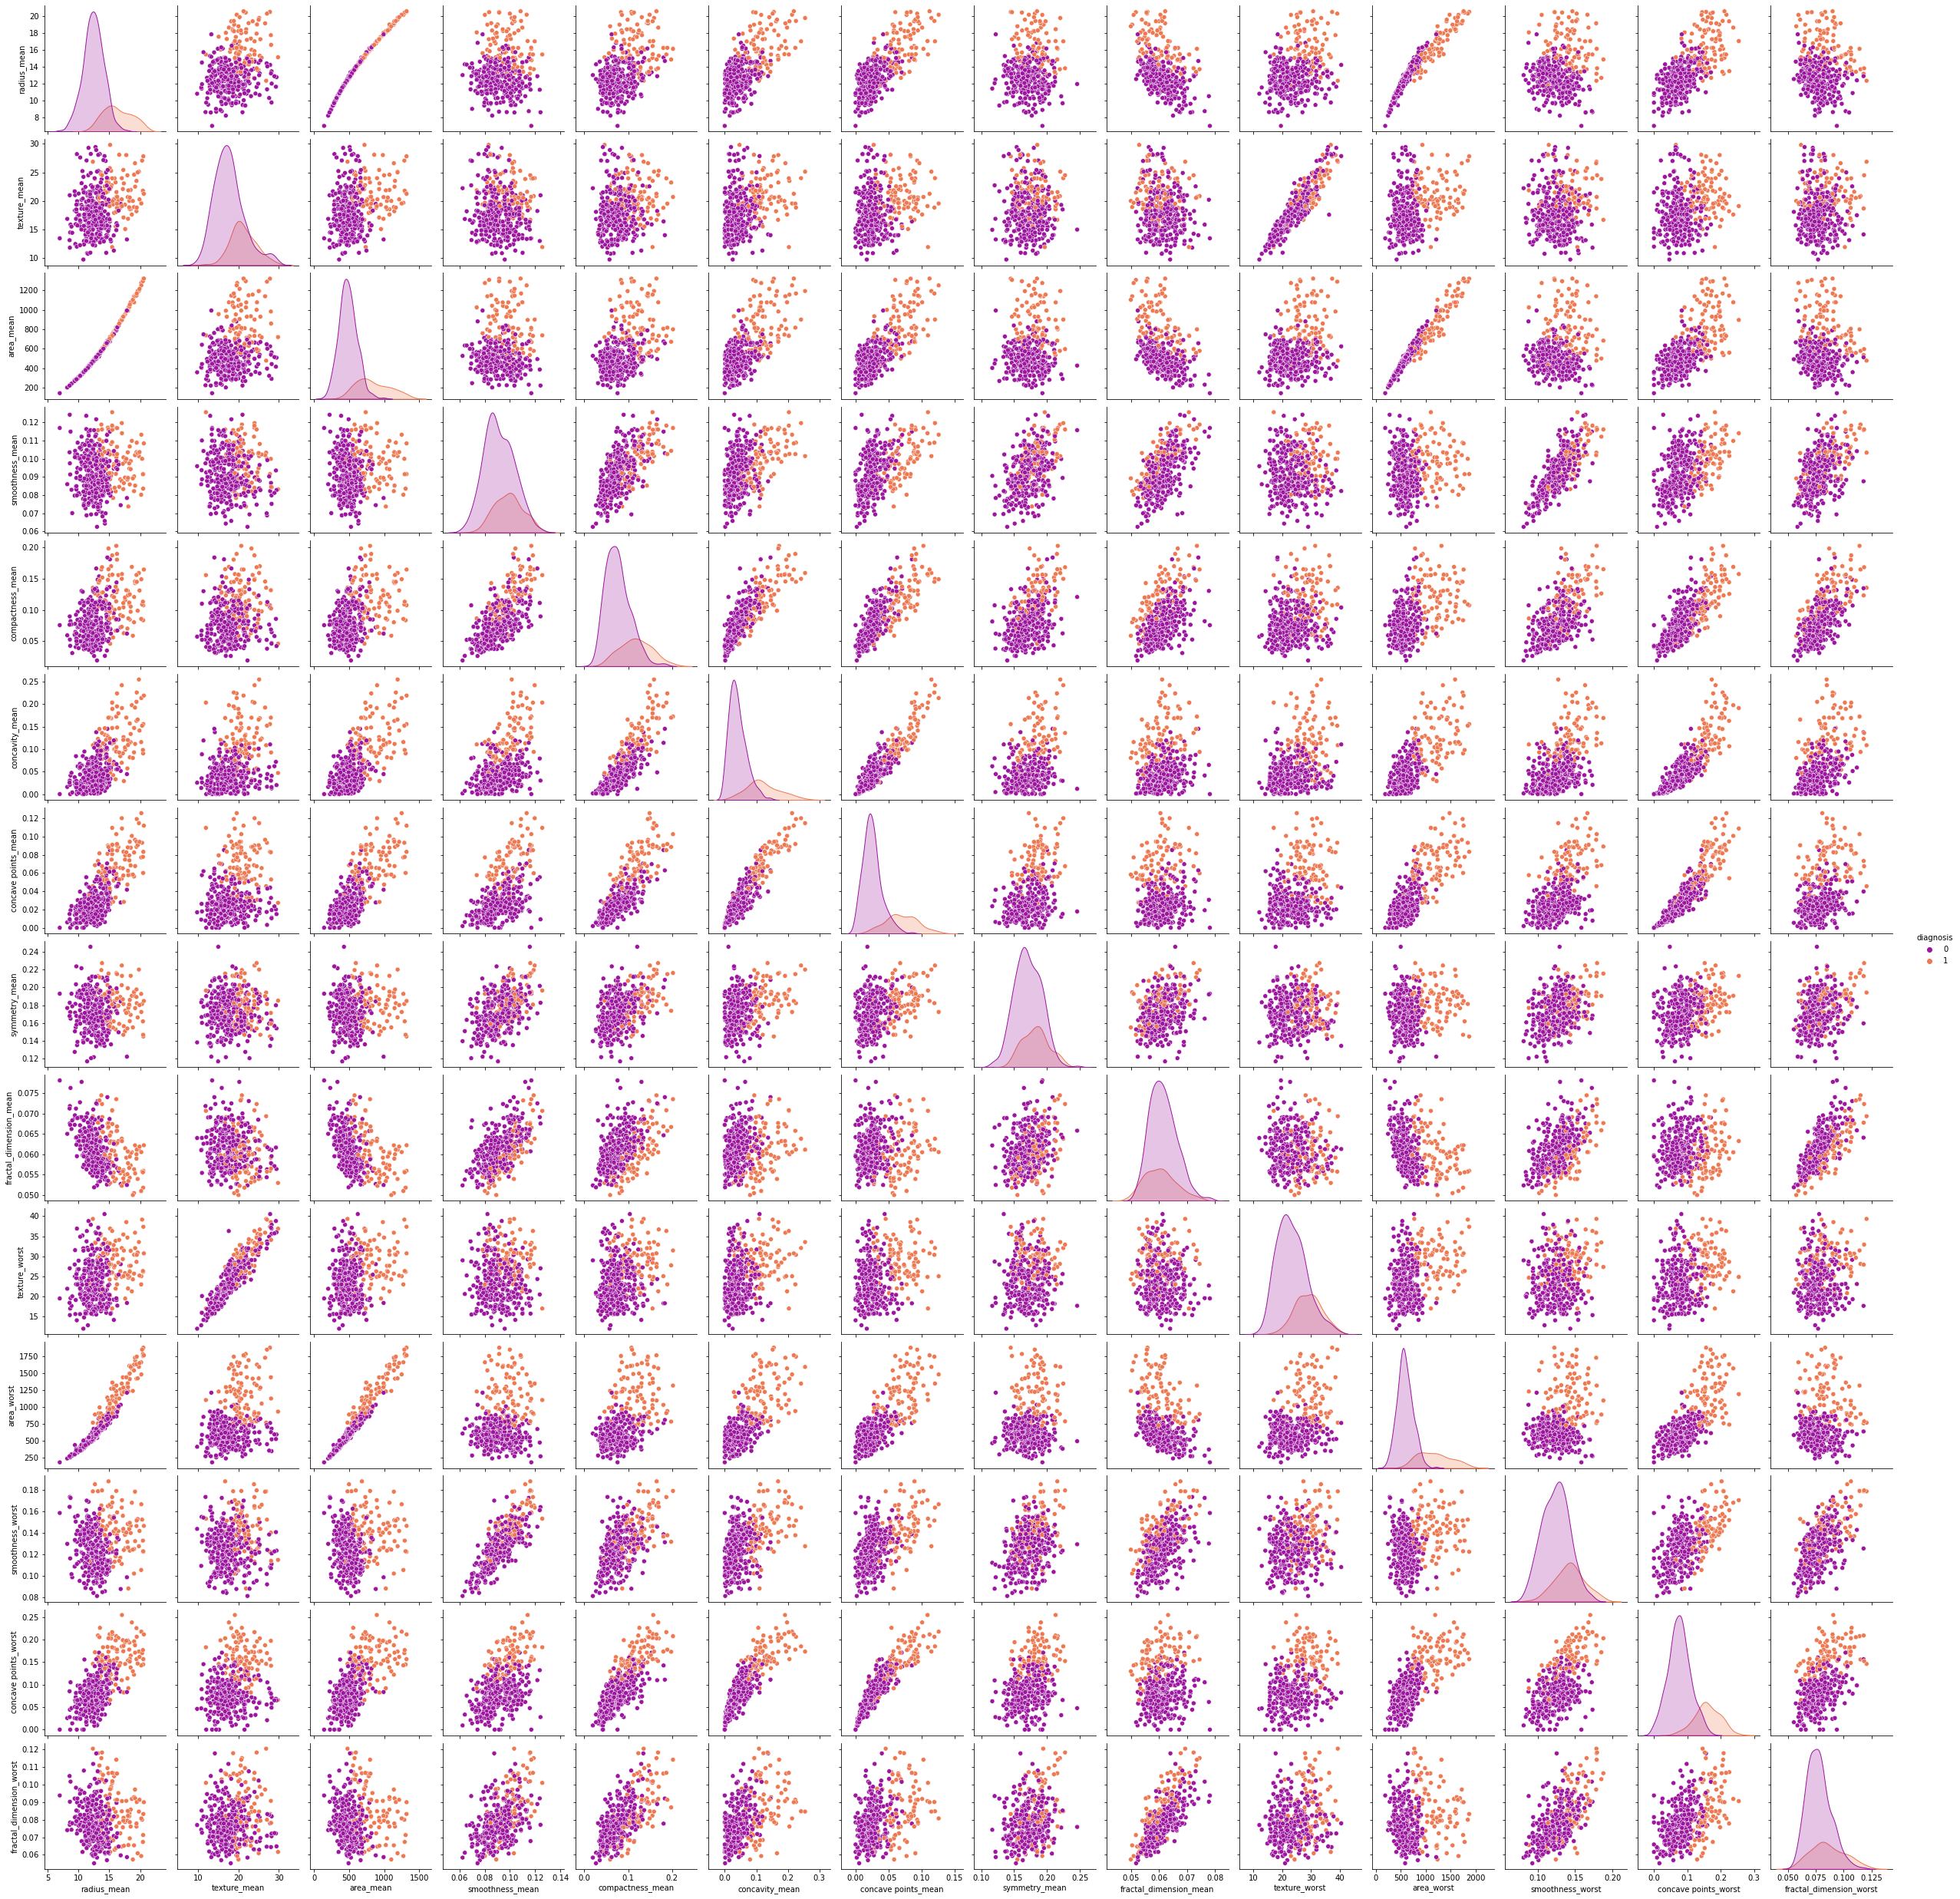

In [18]:
# To show the relationship between the variables, use the sns.pairplot() function.
sns.pairplot(new_bc, hue = 'diagnosis', palette = 'plasma', 
             vars = ('radius_mean','texture_mean','area_mean',
                    'smoothness_mean','compactness_mean','concavity_mean',
                    'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                    'texture_worst','area_worst','smoothness_worst','concave points_worst',
                    'fractal_dimension_worst'))

The true depiction of the significant variables can be seen using a pair plot. It also shows how variables are related to each other. Furthermore, the color of the data points indicates the type of diagnosis.

Text(0.5, 1.0, 'Figure 4: Hist plot of texture mean')

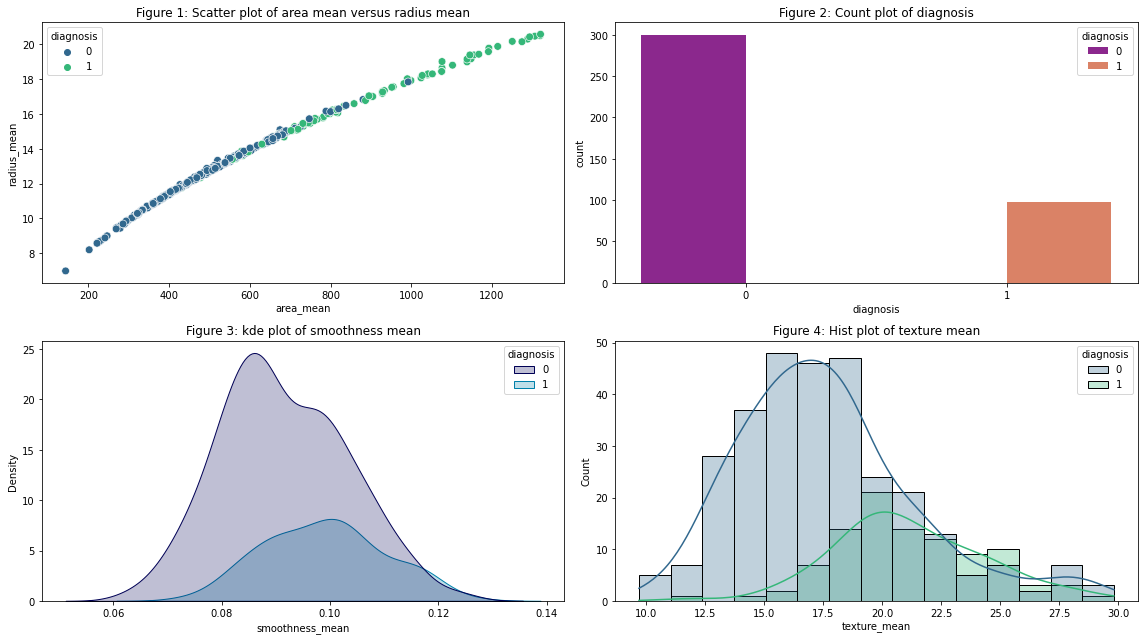

In [19]:
# To create a scatterplot, countplot, kdeplot, or histplot, use subplots.
plt.figure(figsize=(16,9))
# Figure 1
plt.subplot(2,2,1)
sns.scatterplot(x = 'area_mean', y = 'radius_mean', hue = 'diagnosis', palette = 'viridis', 
                data = new_bc,s=60)
plt.tight_layout()
plt.title("Figure 1: Scatter plot of area mean versus radius mean")

# Figure 2
plt.subplot(2,2,2)
sns.countplot(x = 'diagnosis', hue = 'diagnosis', palette = 'plasma', data = new_bc)
plt.title("Figure 2: Count plot of diagnosis")
plt.tight_layout()

# Figure 3
plt.subplot(2,2,3)
sns.kdeplot(x = 'smoothness_mean', hue = "diagnosis", palette = 'ocean', data = new_bc, fill = "brown")
plt.tight_layout()
plt.title("Figure 3: kde plot of smoothness mean")

# Figure 4
plt.subplot(2,2,4)
sns.histplot(x = 'texture_mean', hue = "diagnosis", palette = 'viridis', data = new_bc, kde = True, alpha = 0.3)
plt.tight_layout()
plt.title("Figure 4: Hist plot of texture mean")

The scatterplot showed a positive relationship between the area mean and radius mean of cell nuclei. The count plot depicts the number of observations in each class of diagnosis (target variable). The next plot is a kernel density estimation (KDE) plot, which shows a smooth density curve of a smoothness mean shaded by diagnosis classes. Lastly, the hist plot depicts the underlying texture mean distribution that is distinguished by diagnosis classes.

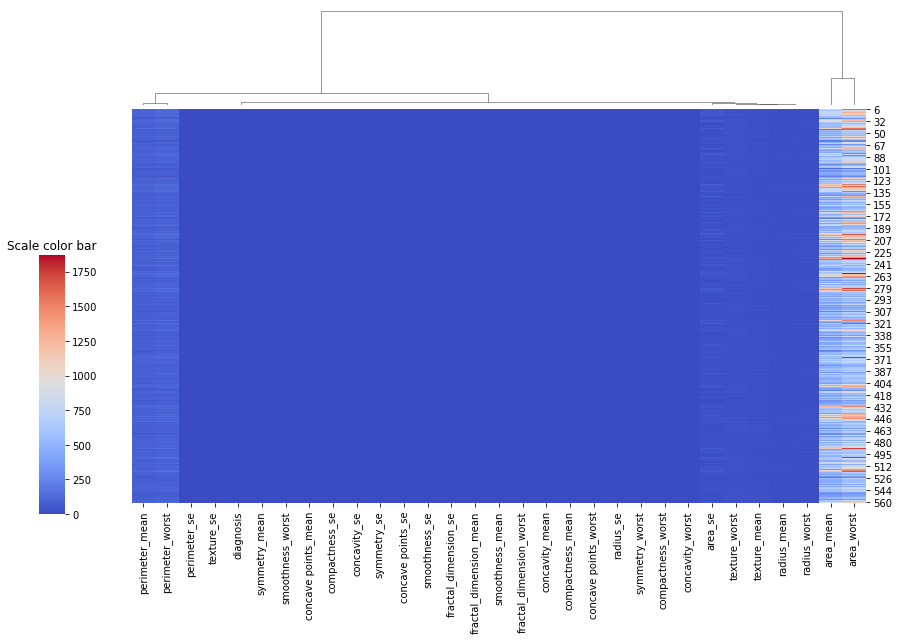

In [20]:
# To display the hierarchical-clustering heatmap of all the variables in the dataset, use the sns.clustermap() function.
sns.clustermap(new_bc, figsize=(12, 9), row_cluster = False, dendrogram_ratio=(.1, .2),
                      cbar_pos=(0, .2, .03, .4),cmap = 'coolwarm')
plt.title("Scale color bar")
# To ignore the warning, use the filterwarnings() function.
warnings.filterwarnings('ignore')


The dendrograms of the hierarchical-clustering heatmap indicate the similarity among the variables. The rows of the hierarchical-clustering heatmap depict the colors associated with the scale color bar.


Text(0.5, 1.0, 'Distribution Plot of area mean')

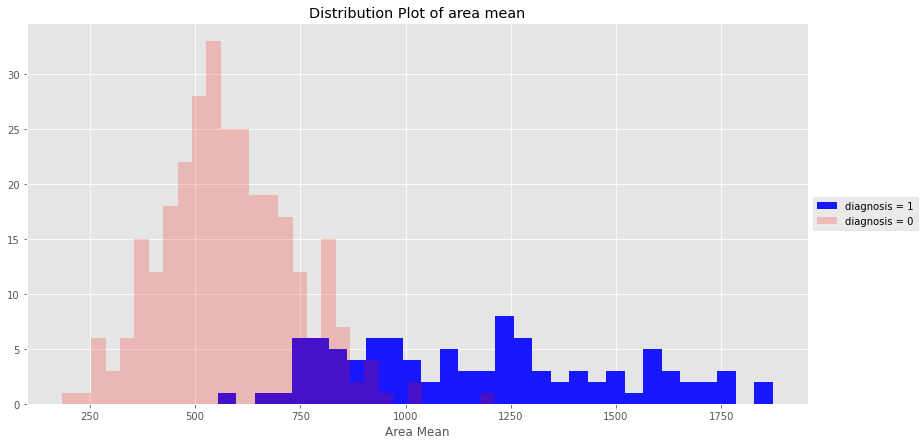

In [21]:
# Create a distinct income distribution plot by filtering an area mean.
plt.style.use('ggplot')
plt.figure(figsize=(14,7))

# Create a graph with multiple distribution plots.
new_bc[new_bc['diagnosis'] == 1]['area_worst'].hist(bins = 30, alpha = 0.9, 
                                color = 'blue', label = 'diagnosis = 1')

new_bc[new_bc['diagnosis'] == 0]['area_worst'].hist(bins = 30, alpha = 0.2, 
                                color = 'red', label = 'diagnosis = 0')

plt.legend(loc= 'center left', bbox_to_anchor = (1,0.5))
plt.xlabel('Area Mean')
plt.title( 'Distribution Plot of area mean')

The area mean distribution plot shows the underlying distribution of each diagnosis class. In the graph's legend, the malignant tumor cell is represented by 1, and the benign tumor cell is represented by 0. The benign cells concentrated around the 700 area mean, while the malignant tumor cells centered around the 1250 area mean.

Text(0.5, 1, 'Marginal Histogram of radius mean versus radius worst')

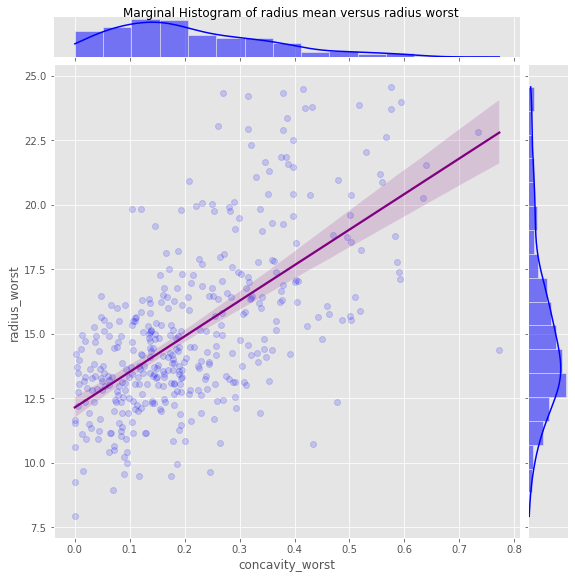

In [22]:
# To display a joint plot/ Marginal histogram plot, call sns.jointplot().
plt.style.use('ggplot')
sns.jointplot(x = 'concavity_worst',y = 'radius_worst' , data = new_bc, 
              kind = 'reg',scatter_kws={'alpha':0.15}, line_kws={'color': 'purple'}, 
              height = 8, ratio = 10, dropna= True, color = "blue")

# Show a title of the marginal histogram.
plt.suptitle("Marginal Histogram of radius mean versus radius worst", y =1)

The scatter plot and underlying distribution are displayed at the top of each axis in a marginal histogram plot. The concavity worst and radius worst have a positive association. Radius and concavity worst distributions are somewhat skewed to the right.

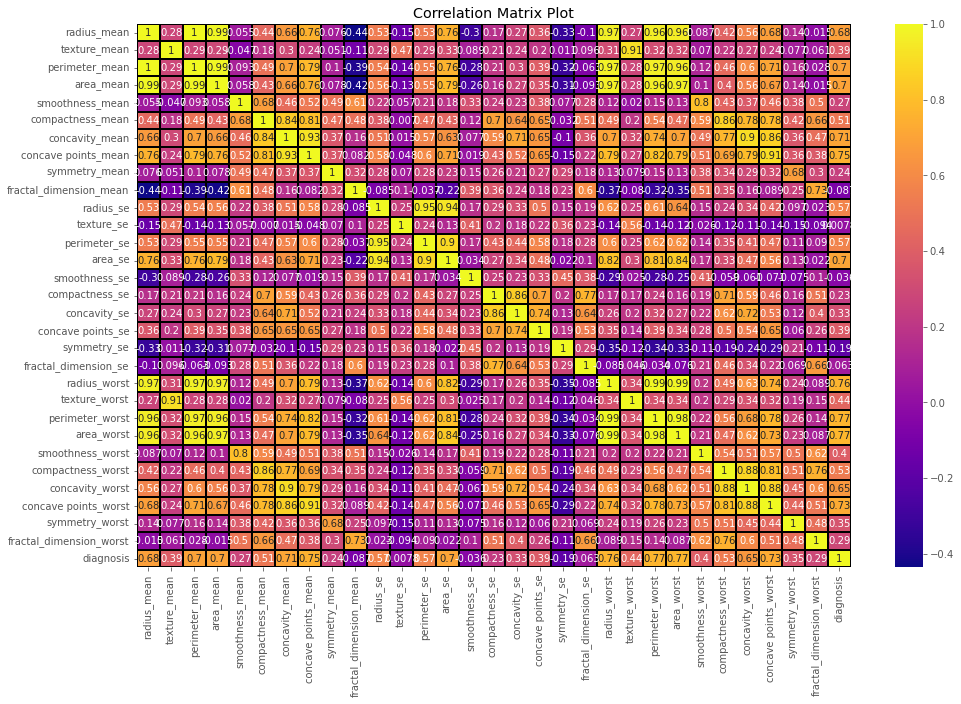

In [23]:
# Create a correlation matrix plot.
plt.figure(figsize = (16,10))

# Create a variable called cor to calculate correlation.
cor = new_bc.corr()

# To visualize the correlation matrix, use a sns.heatmap() function.
cor1 = sns.heatmap(cor,cmap = 'plasma', 
                  linecolor = 'black', linewidths = 2, 
                  annot = True).axes.set_title("Correlation Matrix Plot")
cor1
plt.show()

The correlation matrix plot showed a perfect, positive or negative correlation among each variable in the dataset. The color of each grid varies by the propensity of the scale color bar. The text annotations can be seen above in the correlation matrix plot.

In [111]:
# Add a variable named cor that calculates whether variables are positively or negatively correlated.
cor = new_bc.corr()
corr_pair = cor.unstack()
sort_corr_pair = corr_pair.sort_values(kind = 'quicksort')

# Show a negative and positve pairs of correlation.
negative_pairs = sort_corr_pair[sort_corr_pair < 0]
positive_pairs = sort_corr_pair[sort_corr_pair > 0]

print('The negative pairs of correlation are as follows:','\n','{}'.format(negative_pairs))
print('\n')
print('The positive pairs of correlation are as follows:','\n','{}'.format(positive_pairs))

The negative pairs of correlation are as follows: 
 fractal_dimension_mean   radius_mean               -0.436397
radius_mean              fractal_dimension_mean    -0.436397
fractal_dimension_mean   area_mean                 -0.423006
area_mean                fractal_dimension_mean    -0.423006
perimeter_mean           fractal_dimension_mean    -0.393736
                                                      ...   
fractal_dimension_worst  area_mean                 -0.014754
                         radius_mean               -0.014583
radius_mean              fractal_dimension_worst   -0.014583
texture_se               compactness_mean          -0.007041
compactness_mean         texture_se                -0.007041
Length: 126, dtype: float64


The positive pairs of correlation are as follows: 
 texture_se            diagnosis               0.007755
diagnosis             texture_se              0.007755
texture_mean          symmetry_se             0.011039
symmetry_se           texture_

In [25]:
# Show an interactive histogram plots of the defined variables.
plt.style.use('ggplot')
new_bc[['radius_mean','area_mean', 'smoothness_mean','texture_mean','concavity_mean','perimeter_mean',
        'fractal_dimension_mean','compactness_mean']].iplot(kind = 'hist', subplots = True, bins = 30,title = "Histogram Plots")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

The histogram plots depict a true representation of the underlying distribution of the defined variables. The values of each defined variable can be seen by hovering over the histogram plots.

*********************************************************************************************************************

The following supervised machine learning algorithms are used in this project:
logistic regression, QDA (Quadratic discriminant analysis), K-NN (K-nearest neighbor), Artificial Neural Network, SVM, and decision tree.

# 1. Logistic Regression Algorithm

In [26]:
# Define the variables X and y.
X = new_bc.drop('diagnosis', axis = 1)
y = new_bc['diagnosis']

In [27]:
# Import a library called train_test_split from scikit learn.
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
# Import LogisticRegression from scikit learn linear family.
from sklearn.linear_model import LogisticRegression

# Feature Selection Techniques

# (a).    Recursive Feature Elimination (RFE) Approach
* RFE is an efficient approach for eliminating features from a training dataset for feature selection. RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

In [28]:
# Create an instance of logistic regression().
model = LogisticRegression()

# Fit a model with desired number of variables.
rfe = RFE(model, 10)
fit = rfe.fit(X, y)

# Print the number of features along with their rankings.
print("Number of Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Define a variable called rank.
rank = pd.DataFrame(fit.ranking_)
names = pd.DataFrame(new_bc.columns)

# Create a dataframe called dat.
dat = pd.concat([names, rank], axis = 1)
dat.columns = ['Selected features','Rank']

# Filter a dat dataframe.
dat = dat[dat['Rank']==1]
dat

Number of Features: 10
Selected Features: [ True False False False False False  True  True False False False  True
  True False False False False False False False  True  True  True False
 False False  True  True False False]
Feature Ranking: [ 1 18 16 21  9  5  1  1  6 20 15  1  1 12 17 13  8 11 14 19  1  1  1 10
  2  3  1  1  4  7]


Selected features  Rank
0            radius_mean   1.0
6         concavity_mean   1.0
7    concave points_mean   1.0
11            texture_se   1.0
12          perimeter_se   1.0
20          radius_worst   1.0
21         texture_worst   1.0
22       perimeter_worst   1.0
26       concavity_worst   1.0
27  concave points_worst   1.0

As per the Recursive feature elimination (RFE) approach, the selected features, as well as their ranking, can be seen above in the table.

# (b). Lasso Regression Cross validation approach
* Lasso regression will automatically choose those features that are beneficial, eliminating those that are redundant or worthless to minimize the cost function.  When a feature is eliminated from a Lasso regression, the coefficient of that feature becomes zero.

In [29]:
# Import LassoCV from scikit learn library.
from sklearn.linear_model import LassoCV
# Import selectfrommodel() from scikit learn library.
from sklearn.feature_selection import SelectFromModel

In [30]:
# Create an instance of LassoCV().Set the cross validation equal to 5.
lasso = LassoCV(cv = 5, normalize = True)

In [31]:
# Pass an arguments estimator and set a minimum threshold of 0.25 to the selectfrommodel().
mod = SelectFromModel(estimator = lasso, threshold=0.25, prefit=False, norm_order=1, max_features=None)
mod.fit(X,y)
features = mod.get_support()

# Extract feature names frrom the training dataset.
feature_names = X.columns[features]
feature_names = pd.DataFrame(feature_names)
feature_names.columns = ['Selected Features']
feature_names

Selected Features
0         compactness_mean
1           concavity_mean
2      concave points_mean
3   fractal_dimension_mean
4            smoothness_se
5           compactness_se
6              symmetry_se
7     fractal_dimension_se
8     concave points_worst
9  fractal_dimension_worst

# (c). Ridge regression cross validation approach
* Ridge regression keeps all variables while reducing the coefficients towards zero. Ridge regression uses a more subtle approach to select features,' lowering the magnitude of the coefficients rather than setting them to zero. Ridge regression removes the features with lower coefficients.

In [32]:
# Import RidgeCV from scikit learn library.
from sklearn.linear_model import RidgeCV

In [33]:
# Create an instance of RidgeCV().
ridge = RidgeCV(cv = 5, normalize=True)

In [34]:
# To selectfrommodel(), pass an arguments estimator and a minimum threshold of 0.25.
mod = SelectFromModel(estimator = ridge, threshold=0.25, prefit=False, norm_order=1, max_features=None)
mod.fit(X,y)
features = mod.get_support()

# Extract feature names from the training dataset.
feature_names = X.columns[features]
feature_names = pd.DataFrame(feature_names)
feature_names.columns = ['Selected Features']
feature_names

Selected Features
0           smoothness_mean
1          compactness_mean
2            concavity_mean
3       concave points_mean
4    fractal_dimension_mean
5             smoothness_se
6            compactness_se
7              concavity_se
8               symmetry_se
9      fractal_dimension_se
10         smoothness_worst
11     concave points_worst
12           symmetry_worst
13  fractal_dimension_worst

After comparing the first model with the second and third models, the first model showed an accuracy of 93%. The second model showed an accuracy of 75%, and the third model showed 78% accuracy. Thus, I dropped the second and third models and continued with the first model selection technique.

# Fit a logistic regression model with 10 predictors.

In [35]:
# Define the variables X and y.
X = new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']]
y = new_bc['diagnosis']

In [36]:
# Split 30% of the data to the test data set.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.3, random_state=100)

In [37]:
# Define an instance of LogisticRegression called logmodel.
logmodel = LogisticRegression()


In [38]:
# Fit a logistic regression model.
logmodel.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Predict the logistic regression model. Give a name predictions to the variable.
predictions = logmodel.predict(X_test)

In [40]:
# Import an evaluation metrics from scikit learn metrics.
from sklearn.metrics import classification_report,confusion_matrix

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        90
           1       0.89      0.83      0.86        30

    accuracy                           0.93       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.93      0.93      0.93       120





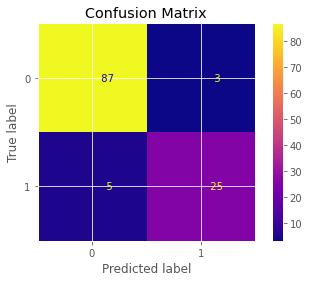

In [41]:
# Show a report on evaluation metrics.
print(classification_report(y_test, predictions))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='plasma', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

The accuracy of the logistic regression model was 93 %, which is extremely good. Furthermore, it only misclassified eight entries in the confusion matrix. Other evaluation metrics including accuracy, recall, and F1-score appeared to be in good shape.

In [42]:
# Compute an accuracy rate calling metrics fom scikit learn library.
log_acc = round(metrics.accuracy_score(y_test, predictions)*100,3)

# Check an error rate. Give a name to the variable log_err.
log_err = round(np.mean(y_test != predictions)*100,3)

# Print an accuracy and error rate.
print("The accuracy rate is",log_acc,"%.")
print("The error rate is",log_err,"%.")

The accuracy rate is 93.333 %.
The error rate is 6.667 %.


The error rate is 6.6 percent, indicating that a significant percentage of the results were not equal to the projected values.

In [43]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 25
TN = 87
FP = 3
FN = 5

# Compute sensitivity and store to a variable called log_sensitivity.
log_sensitivity = (TP) / (TP + FN)
print('The sensitivity is',round(log_sensitivity,2)*100,"%.")

# Compute specificity and store to a variable called log_specificity.
log_specificity = (TN) / (TN + FP)
print('The specificity is',round(log_specificity,3)*100,"%.")

The sensitivity is 83.0 %.
The specificity is 96.7 %.


Sensitivity and specificity are measures of a test's ability to correctly classify a person as having a disease or not having a disease. The specificity rate of a logistic regression model is as high as 96.7 %, which is a favorable sign. It indicates that there are few false-positive results. In healthcare, a low specificity rate may not be feasible to use for screening the diseases in the patients because it will lead to an unnecessary diagnostic procedure.

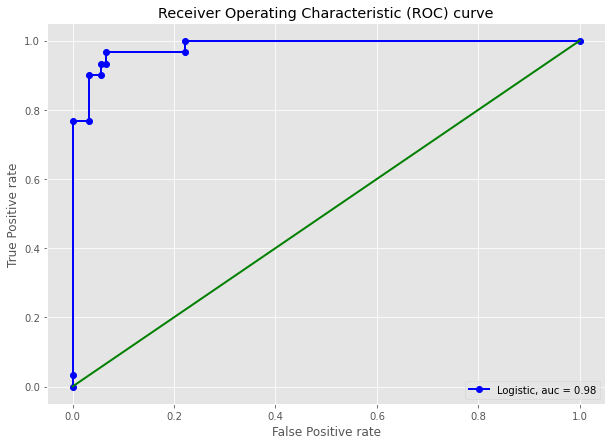

In [44]:

# Plot Receiver Operating Characteristic (ROC) curve.
plt.figure(figsize= (10,7))
# Compute the predicted probability by using a predict_proba() function.
y_pred_prob = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)


# Plot the ROC curve and line join the end points.
plt.plot(fpr,tpr,label="Logistic, auc = {}".format(round(auc,2)), 
         color = "blue",ls ='-',
         marker = 'o',lw = 2)
plt.plot([0,1],[0,1],lw = 2, color = 'green')

# Define legend and update x and y lables of a ROC curve.
plt.legend(loc=4, bbox_to_anchor = (1,0))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.show()

In general, the model is better if the ROC curve is close to one. In other words, when the ROC curve is close to one, that indicates a perfect classification. The area under the curve (AUC) in this case is 0.98 or 98 %, indicating that it is a decent classifier. The green line represents a completely uninformative test, which corresponds to an AUC of 0.5.

# 2. Quadratic discriminant analysis
* Quadratic discriminant analysis (QDA) is similar to linear discriminant analysis (LDA), in which measurements from each class are considered to be normally distributed.

In [45]:
# Define the variables X and y.
X = new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']]
y = new_bc['diagnosis']

In [46]:
# Split 30% of the data to the test data set.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                        test_size=0.3, random_state=100)

In [47]:
# Import QuadraticDiscriminantAnalysis() from scikit learn discriminant analysis family.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [48]:
# Create an instance qda of QuadraticDiscriminantAnalysis().
qda = QuadraticDiscriminantAnalysis()

In [49]:
# Fit a training data to the qda model.
qda.fit(X_train1, y_train1)

QuadraticDiscriminantAnalysis()

In [50]:
# Predict a qda model.
qda_pred = qda.predict(X_test1)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        90
           1       0.79      0.90      0.84        30

    accuracy                           0.92       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.92      0.92      0.92       120





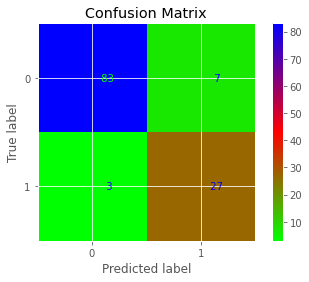

In [51]:
# Show a report on evaluation metrics.
print(classification_report(y_test1, qda_pred))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test1, qda_pred)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='brg_r', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

The evaluation criteria such as precision, accuracy, recall, and F1-score are all extremely remarkable on average. When compared to the logistic model, it has a few more misclassifications, lowering the accuracy rate by 1%.

In [52]:
# Compute an accuracy rate
qda_acc = round(metrics.accuracy_score(y_test1, qda_pred)*100,3)

# Check an error rate.
qda_err = round(np.mean(y_test1 != qda_pred)*100,3)

# Print an accuracy and error rate.
print("The accuracy rate is",qda_acc,"%.")
print("The error rate is",qda_err,"%.")

The accuracy rate is 91.667 %.
The error rate is 8.333 %.


When compared to a logistic model, the error rate climbed to 8.3 percent. It is a true indication of misclasificaton.

In [53]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 27
TN = 83
FP = 7
FN = 3

# Compute sensitivity and store to a variable called qda_sensitivity.
qda_sensitivity = (TP) / (TP + FN)
print('The sensitivity is',round(qda_sensitivity,2)*100,"%.")

# Compute specificity and store to a variable called qda_specificity.
qda_specificity = (TN) / (TN + FP)
print('The specificity is',round(qda_specificity,3)*100,"%.")

The sensitivity is 90.0 %.
The specificity is 92.2 %.


The sensitivity increased to 90%, while the specificity decreased to 92 percent. This isn't a favorable classifier as compared to the logistic classifier.

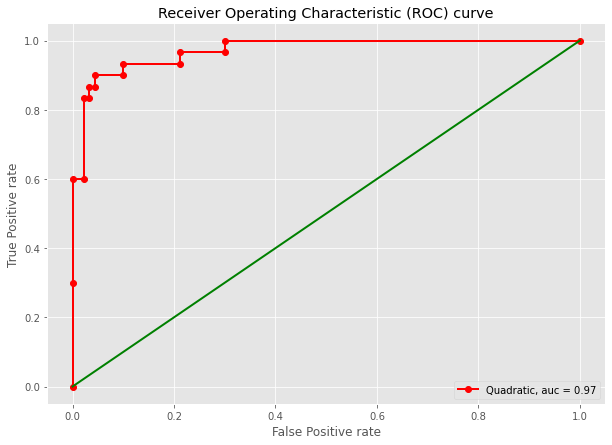

In [54]:
# Plot Receiver Operating Characteristic (ROC) curve.
plt.figure(figsize= (10,7))
# Compute the predicted probability by using a predict_proba() function.
y_pred_prob1 = qda.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred_prob1)
auc = metrics.roc_auc_score(y_test1, y_pred_prob1)


# Plot the ROC curve and line join the end points.
plt.plot(fpr,tpr,label="Quadratic, auc = {}".format(round(auc,2)), 
         color = "red",ls ='-',
         marker = 'o',lw = 2)
plt.plot([0,1],[0,1],lw = 2, color = 'green')

# Define legend and update x and y lables of a ROC curve.
plt.legend(loc=4, bbox_to_anchor = (1,0))
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.show()

The green line represents a completely uninformative test, which corresponds to an AUC of 0.5. The area under the curve (AUC) in this case is 0.97 or 97%, indicating that it is a decent classifier.

# 3. KNN (K-nearest neighbors algorithm)
* The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, the KNN algorithm can be used for applications that require high accuracy.

In [55]:
# Import standard scaler from scikit learn.
from sklearn.preprocessing import StandardScaler

# Create the scaler variable. Scaler is a standard scaler instance.
scaler = StandardScaler()

In [56]:
# Standardize the data.
scaler.fit(new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']])

StandardScaler()

In [57]:
# Use a scaler.transform() function to transform the data to a standard scale.
scaled_feature = scaler.transform(new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']])
col = new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']]

# Create a variable col to look at the standardize columns.
col = col.columns

# Create a standardize version dataframe.
df = pd.DataFrame(scaled_feature, columns = col)
df.head()

radius_mean  concavity_mean  concave points_mean  texture_se  perimeter_se  \
0     1.964461        1.066356             1.488638   -0.767777      1.151088   
1     0.134540        0.677832             0.935739    0.684948      1.909090   
2     1.065623       -0.560181            -0.104415    0.227813      0.350476   
3     0.968887        0.797817             1.178389   -0.258433      1.581669   
4     0.997102        0.794553             0.693088   -0.034437      0.840486   

   radius_worst  texture_worst  perimeter_worst  concavity_worst  \
0      2.413510       0.521788         2.468580         1.121869   
1      0.610898       0.607065         0.541116         0.369659   
2      1.270617       1.626840         1.138359        -0.459405   
3      1.651581       0.454277         1.712978         1.244971   
4      0.542758       0.521788         0.604460         0.127537   

   concave points_worst  
0              1.941020  
1              1.187592  
2              0.068471  
3              1.696556  
4              0.311933

In [58]:
# Define X and y variables.
X = df
y = new_bc['diagnosis']

In [59]:
# Split 30% standardize version of the data to the test set. Set a random state equal to 101.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, 
                        test_size=0.3, random_state=100)

In [60]:
# Import KNeighborsClassifier from scikit learn neighbors family.
from sklearn.neighbors import KNeighborsClassifier
# Pass an argument number of neighbors to KNeighborsClassifier, give a name to the variable knn.
knn = KNeighborsClassifier(n_neighbors = 1)

In [61]:
# Fit a knn model.
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=1)

In [62]:
# Define a variable pred which stores knn predictions.
knn_pred = knn.predict(X_test2)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.84      0.90      0.87        30

    accuracy                           0.93       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.94      0.93      0.93       120





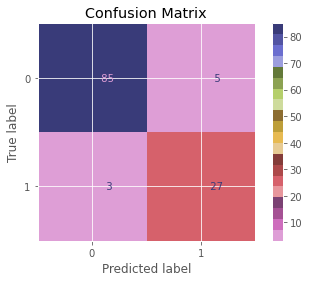

In [63]:
# Show a report on performance evaluation metrics.
# Call a function called classification_report and show the evaluation metrics.
print(classification_report(y_test2, knn_pred))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test2, knn_pred)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='tab20b_r', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

The only values that are misclassified are 8 entries, which isn't too bad when compared to the quadratic discriminant analysis model.

In [64]:
# Apply an elbow method to choose a correct/optimize k value with elbow method.
error_rate = [] # empty array list

# Check every possible k values from 1 to 25
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train2, y_train2)
    predic = knn.predict(X_test2)
    error_rate.append(np.mean(y_test2!= predic))

Text(0, 0.5, 'error rate')

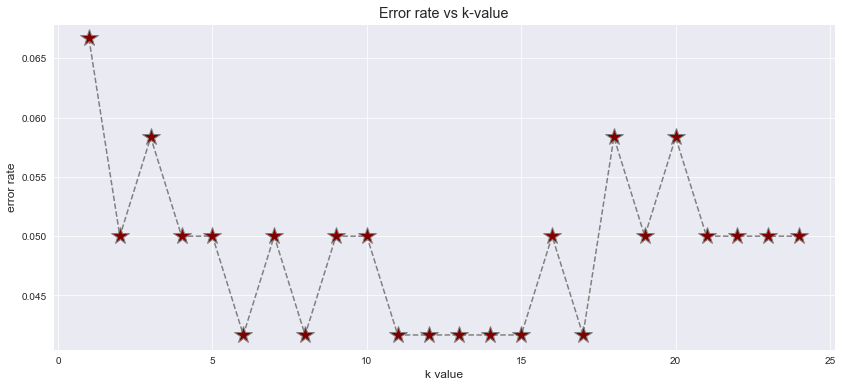

In [117]:
sns.set_style('darkgrid')
# Plot an error rate.
plt.figure(figsize= (14,6))
plt.plot(range(1,25), error_rate, color = 'grey', ls = '--', marker = '*', markerfacecolor = 'maroon',markersize = 18)
plt.title("Error rate vs k-value")
plt.xlabel("k value")
plt.ylabel('error rate')

I applied an elbow method to identify the optimal k-value. It suggested that k = 6,8,11,12,13,14,15 and 17 are the optiminal k-values. 

Accuracy: 95.83 .
Precision: 87.88 .
Recall: 96.67 .
F1 Score: 92.06 .


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.88      0.97      0.92        30

    accuracy                           0.96       120
   macro avg       0.93      0.96      0.95       120
weighted avg       0.96      0.96      0.96       120





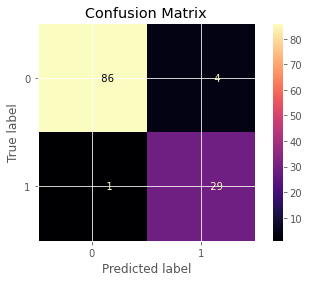

In [66]:
# Use an optimize k-neighbor value equal to 14. Repeat the process again.
knn = KNeighborsClassifier (n_neighbors = 14)
knn.fit(X_train2, y_train2)
p = knn.predict(X_test2)
knn_acc = metrics.accuracy_score(y_test2, p)*100
print("Accuracy:",round(metrics.accuracy_score(y_test2, p)*100,2),".")
print("Precision:",round(metrics.precision_score(y_test2, p)*100,2),".")
print("Recall:",round(metrics.recall_score(y_test2, p)*100,2),".")
print("F1 Score:",round(metrics.f1_score(y_test2, p)*100,2),".")
print('\n')

# Show a report on performance evaluation metrics.
# Call a function called classification_report and show the evaluation metrics.
print(classification_report(y_test2, p))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test2, p)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='magma', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

The overall findings are quite impressive, with the knn model segregating neighbors with k equal to 14. Furthermore, the number of entries that were misclassified decreased to 5. It's an early sign of which model is the best.

In [67]:
# Compute an accuracy rate
knn_acc = round(metrics.accuracy_score(y_test2, p)*100,3)

# Check an error rate.
knn_err = round(np.mean(y_test2 != p)*100,3)

# Print an accuracy and error rate.
print("The accuracy rate is",knn_acc,"%.")
print("The error rate is",knn_err,"%.")

The accuracy rate is 95.833 %.
The error rate is 4.167 %.


The error rate has also lowered to 4%. It will be considered the most acceptable model.

In [68]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 29
TN = 86
FP = 4
FN = 2

# Compute sensitivity and store to a variable called knn_sensitivity.
knn_sensitivity = (TP) / (TP + FN)
print('The sensitivity is',round(knn_sensitivity,2)*100,"%.")

# Compute specificity and store to a variable called knn_specificity.
knn_specificity = (TN) / (TN + FP)
print('The specificity is',round(knn_specificity,3)*100,"%.")

The sensitivity is 94.0 %.
The specificity is 95.6 %.


The specificity rate is quite high, implying that there are only fewer false positives. Additionally, the sensitivity rate is higher, resulting in fewer false negatives.

# 3. Artificial neural network (ANN)
* Artificial neural networks (ANNs), usually simply called neural networks (NNs). An artificial neural network is an interconnected group of nodes, inspired by a simplification of neurons in a brain. 

In [69]:
# Define the variables X and y.
X = new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']].values
y = new_bc['diagnosis'].values

In [70]:
# Call train_test_split() function to split 30% data to the test set randomly. 
X_train3, X_test3, y_train3, y_test3 = train_test_split(
     X, y, test_size = 0.3, random_state=100)

In [71]:
# Import a MinMaxScaler from sckit learn library.
from sklearn.preprocessing import MinMaxScaler

In [72]:
# Create an instance scaler of MinMaxScaler().
scaler = MinMaxScaler()

In [73]:
# Transform the data using MinMaxScaler instance.
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.fit_transform(X_test3)

In [74]:
# Import Sequential from tensorflow and keras libraries.
from tensorflow.keras.models import Sequential

# Import Dense from tensorflow and keras libraries.
from tensorflow.keras.layers import Dense

In [75]:
# Create an artificial neural network model.
model = Sequential()

# Add an input and the first hidden layer to the model.
# Use rectified linear unit (relu) an activation function.
# Input dim tells us the number of nodes in the Input Layer.
model.add(Dense(units = 10,input_dim = 10, activation='relu'))

# Add a second hidden layer to the model.
model.add(Dense(units = 6,activation='relu'))


# Add an output layer to the model.
model.add(Dense(units = 1 ,activation='sigmoid')) 
# I used sigmoid because it is a binary classification problem.

# Compile the Artificial neural network (ANN) model.
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [76]:
# Fit a training data to the Artificial neural network (ANN) model.
# 300 epochs means training the neural network with all the training data for 300 cycle.
model.fit(x = X_train3, y = y_train3, epochs = 300, 
          validation_data = (X_test3, y_test3))

Train on 278 samples, validate on 120 samples
Epoch 1/300


2021-12-29 07:32:05.142899: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


278/278 [==============================] - 0s 1ms/step - loss: 0.6914 - acc: 0.3525 - val_loss: 0.6937 - val_acc: 0.4167
Epoch 2/300
278/278 [==============================] - 0s 37us/step - loss: 0.6800 - acc: 0.7302 - val_loss: 0.6823 - val_acc: 0.7250
Epoch 3/300
278/278 [==============================] - 0s 44us/step - loss: 0.6698 - acc: 0.8525 - val_loss: 0.6724 - val_acc: 0.7833
Epoch 4/300
278/278 [==============================] - 0s 48us/step - loss: 0.6600 - acc: 0.8022 - val_loss: 0.6614 - val_acc: 0.7667
Epoch 5/300
278/278 [==============================] - 0s 47us/step - loss: 0.6489 - acc: 0.7878 - val_loss: 0.6519 - val_acc: 0.7750
Epoch 6/300
278/278 [==============================] - 0s 47us/step - loss: 0.6389 - acc: 0.7770 - val_loss: 0.6427 - val_acc: 0.7750
Epoch 7/300
278/278 [==============================] - 0s 49us/step - loss: 0.6290 - acc: 0.7734 - val_loss: 0.6331 - val_acc: 0.7667
Epoch 8/300
278/278 [==============================] - 0s 46us/step - loss:

In [77]:
# Create a dataframe of losses and accuracy before evaluating the performance on the test set.
losses = pd.DataFrame(model.history.history)

# Use a head() function to extract first five rows.
losses.head()

val_loss   val_acc      loss       acc
0  0.693663  0.416667  0.691419  0.352518
1  0.682327  0.725000  0.680017  0.730216
2  0.672389  0.783333  0.669779  0.852518
3  0.661372  0.766667  0.659963  0.802158
4  0.651904  0.775000  0.648937  0.787770

Text(0, 0.5, 'Loss')

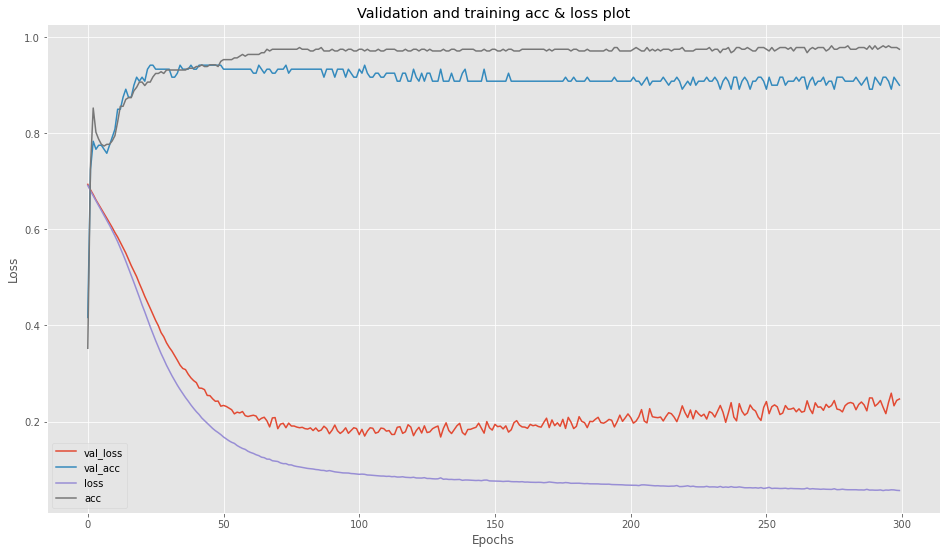

In [78]:
# Visualize an accuracy and losses on the plot.
losses.plot(figsize = (16,9), title = "Validation and training acc & loss plot")
plt.xlabel('Epochs')
plt.ylabel('Loss')

As demonstrated above, the validation loss is slightly higher than the training loss, indicating that the model has been overfitted. In addition, validation accuracy is comparable to training accuracy.

In [79]:
# Evaluate the artificial neural network model on the test dataset.
ann_pred = model.predict_classes(X_test3)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        90
           1       0.74      0.93      0.82        30

    accuracy                           0.90       120
   macro avg       0.86      0.91      0.88       120
weighted avg       0.92      0.90      0.90       120





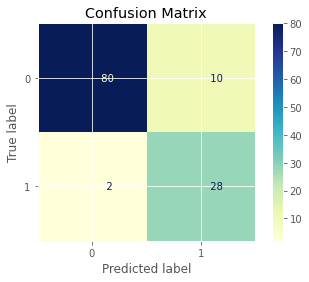

In [80]:
# Show the classification matrix and confusion matrix.
print(classification_report(y_test3, ann_pred))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test3, ann_pred)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='YlGnBu', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

The artificial neural network (ANN) model performed exceptionally well. There are just eight entries that are misclassified. Furthermore, other performance indicators including precision, recall, F1-score, and accuracy tend to be positive.

In [81]:
# Compute an accuracy rate
ann_acc = round(metrics.accuracy_score(y_test3, ann_pred)*100,3)

# Compute an error_rate of the artificial neural network.
ann_err = round(np.mean(y_test3 != ann_pred)*100,3)

# print an accuracy and error rate.
print("The accuracy rate is",ann_acc,"%.")
print("The error rate is",ann_err,"%.")

The accuracy rate is 90.0 %.
The error rate is 40.833 %.


The artificial neural network (ANN) had a substantial error rate, which isn't ideal. This a sign that the rate of test values isn't matching the anticipated values.

In [82]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 29
TN = 83
FP = 7
FN = 1

# Compute sensitivity and store to a variable called ann_sensitivity.
ann_sensitivity = (TP) / (TP + FN)
print('The sensitivity is',round(ann_sensitivity,2)*100,"%.")

# Compute specificity and store to a variable called ann_specificity.
ann_specificity = (TN) / (TN + FP)
print('The specificity is',round(ann_specificity,3)*100,"%.")

The sensitivity is 97.0 %.
The specificity is 92.2 %.


Although the sensitivity and specificity rates are high, they may not be sufficient to assist medical doctors in making the best decision. However, because of the large error rate discrepancy, this model is not suggested to providers.

# 4. Support Vector Machine (SVM)
* SVM is a supervised machine learning algorithm, it consists of support vectors. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. 


In [83]:
# Import Support vector classifier (SVC) function from scikit learn library.
from sklearn.svm import SVC

In [84]:
# Define the variables X and y.
X = new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']]
y = new_bc['diagnosis']

In [85]:
# Split 30% of the data to the test data set.
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, 
                        test_size=0.3, random_state=100)

In [86]:
# Create an instance of support vector classifier (SVC).
svm = SVC()

In [87]:
# Fit a training data to the svm model.
svm.fit(X_train4, y_train4)

SVC()

In [88]:
# Use svm.predict() function to predict the model.
svm_pred = svm.predict(X_test4)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        90
           1       0.92      0.73      0.81        30

    accuracy                           0.92       120
   macro avg       0.92      0.86      0.88       120
weighted avg       0.92      0.92      0.91       120





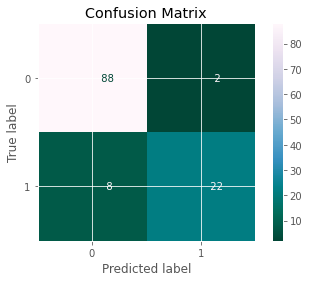

In [89]:
# Show the peformance evaluation metrics of a svm model.
print(classification_report(y_test4, svm_pred))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test4, svm_pred)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='PuBuGn_r', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

The accuracy is 92% and only misclassified 10 entries which isn't terrible. However, support vector machine (SVM) can improve the model's performance by selecting an optimal C and gamma parameters.

In [90]:
# Compute an accuracy rate
svm_acc1 = round(metrics.accuracy_score(y_test4, svm_pred)*100,3)

# Compute an error_rate of the artificial neural network.
svm_err1 = round(np.mean(y_test4 != svm_pred)*100,3)

# print an accuracy and error rate.
print("The accuracy rate is",svm_acc1,"%.")
print("The error rate is",svm_err1,"%.")

The accuracy rate is 91.667 %.
The error rate is 8.333 %.


In [91]:
# Import grid search cross validationfrom scikit learn library.
from sklearn.model_selection import GridSearchCV

In [92]:
# Use a grid search cross validation to find the best C and gamma tunning parameters.
param_grid1 = {'C':[0.1,1,10,100,1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(), param_grid = param_grid1, verbose = 3)
# Higher the verbose number, the more text messages" 

In [93]:
# Fit a model.
grid.fit(X_train4, y_train4)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.764 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.764 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.764 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.764 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.946 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [94]:
# Show the best estimator, the best score, and the best parameter.
print('The best estimator is,',grid.best_estimator_)
print('The best score is,',grid.best_score_)
print('The best parameters are,',grid.best_params_)

The best estimator is, SVC(C=10, gamma=0.0001)
The best score is, 0.9568831168831167
The best parameters are, {'C': 10, 'gamma': 0.0001}


In [95]:
# Define a variable called svm_pred1, predict a model.
svm_pred1 = grid.predict(X_test4)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        90
           1       0.89      0.83      0.86        30

    accuracy                           0.93       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.93      0.93      0.93       120





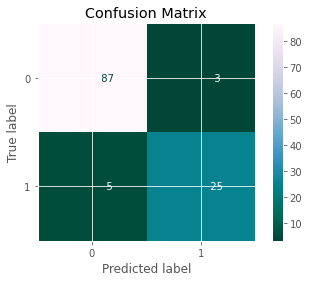

In [96]:
# Show the peformance evaluation metrics of a svm model.
print(classification_report(y_test4, svm_pred1))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test4, svm_pred1)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='PuBuGn_r', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

After applying gridsearch cross validation, the support vector machine(SVM) model imporved the performance.

In [97]:
# Compute an accuracy rate
svm_acc = round(metrics.accuracy_score(y_test4, svm_pred1)*100,3)

# Compute an error_rate of the artificial neural network.
svm_err = round(np.mean(y_test4 != svm_pred1)*100,3)

# print an accuracy and error rate.
print("The accuracy rate is",svm_acc,"%.")
print("The error rate is",svm_err,"%.")

The accuracy rate is 93.333 %.
The error rate is 6.667 %.


After choosing an ideal c and gamma value, the error rate was reduced from 8% to 6.6 %, which is extremely good.

In [98]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 25
TN = 87
FP = 3
FN = 5

# Compute sensitivity and store to a variable called svm_sensitivity.
svm_sensitivity = (TP) / (TP + FN)
print('The sensitivity is',round(svm_sensitivity,2)*100,"%.")

# Compute specificity and store to a variable called svm_specificity.
svm_specificity = (TN) / (TN + FP)
print('The specificity is',round(svm_specificity,3)*100,"%.")

The sensitivity is 83.0 %.
The specificity is 96.7 %.


The specificity has enhanced after choosing the best C and gamma parameters. As a result, it's a good sign in favor of the serious medical problem and decision-making in the proper diagnostic procedure.

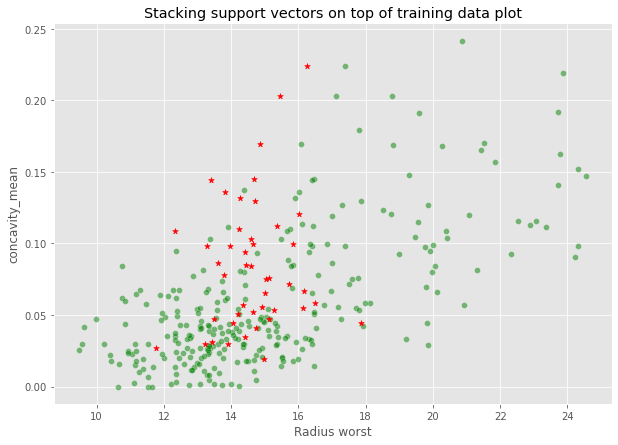

In [99]:
# Visualize the support vector classifier (SVC) using optimal support vectors tuning parameters.
# Show splitting the training data.
plt.figure(figsize = (10,7))
svm1 = SVC(C=10, gamma=0.0001)
svm1 = svm1.fit(X_train4, y_train4)
support_vectors = svm1.support_vectors_
sns.scatterplot(x = X_train4.iloc[:,5], y = X_train4.iloc[:,1], alpha = 0.5,
            color = "green")
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red', marker = '*')
plt.title('Stacking support vectors on top of training data plot')
plt.xlabel('Radius worst')
plt.ylabel('concavity_mean')
plt.show()

The support vectors that increased the margin and separated the data points are the red marked stars. The datapoints in the scatterplot with green dots indicate a positive trend.

# 5. Decision Trees Algorithm
* Decision tree is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. 

In [100]:
# Define the variables X and y.
X = new_bc[['radius_mean','concavity_mean','concave points_mean','texture_se','perimeter_se','radius_worst',
            'texture_worst','perimeter_worst','concavity_worst','concave points_worst']]
y = new_bc['diagnosis']

In [101]:
# Split 30% of the data to the test data set.
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, 
                        test_size=0.3, random_state=100)

In [102]:
# Import DecisionTreeClassifier() function from scikit learn tree family.
from sklearn.tree import DecisionTreeClassifier

# Create an instance dtc of DecisionTreeClassifier().
dtc = DecisionTreeClassifier()

In [103]:
# Fit a decision tree model.
dtc.fit(X_train5, y_train5)

DecisionTreeClassifier()

In [104]:
# Predict a decision tree model.
dtc_pred = dtc.predict(X_test5)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        90
           1       0.79      0.87      0.83        30

    accuracy                           0.91       120
   macro avg       0.87      0.89      0.88       120
weighted avg       0.91      0.91      0.91       120





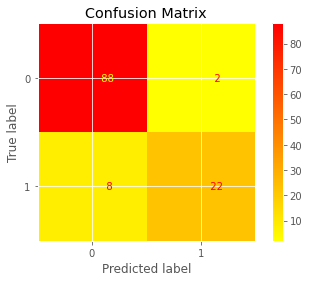

In [105]:
# Showcase the performance evaluation metrics.
print(classification_report(y_test5, dtc_pred))
print('\n')

# Show a confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test4, svm_pred)
labels = [0, 1] 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap='autumn_r', values_format= '12g',)
plt.title("Confusion Matrix")
plt.show()

With an accuracy of 91%, the decision tree model performed admirably. Only 10 entries were misclassified, but not as good as the support vector machine model.

In [106]:
# Compute an accuracy rate
decision_acc = round(metrics.accuracy_score(y_test5, dtc_pred)*100,3)

# Compute an error_rate of the artificial neural network.
decision_err = round(np.mean(y_test5 != dtc_pred)*100,3)

# Print an accuracy and error rate.
print("The accuracy rate is",decision_acc,"%.")
print("The error rate is",decision_err,"%.")

The accuracy rate is 90.833 %.
The error rate is 9.167 %.


The error rate is higher than that of the SVM. As a result, it is regarded as an inferior model than the support vector machine model.

In [107]:
# Manually computed evaluation metrics such as accuracy, precision, recall, and f1 score.
# Define variables TP,TN,FP, and FN.
TP = 26
TN = 83
FP = 7
FN = 4

# Compute sensitivity and store to a variable called decision_sensitivity.
decision_sensitivity = (TP) / (TP + FN)
print('The senstivity is',round(decision_sensitivity,2)*100,"%.")

# Compute specificity and store to a variable called decision_specificity.
decision_specificity = (TN) / (TN + FP)
print('The specificity is',round(decision_specificity,3)*100,"%.")

The senstivity is 87.0 %.
The specificity is 92.2 %.


While the specificity is great, the sensitivity isn't as great as other supervised models.

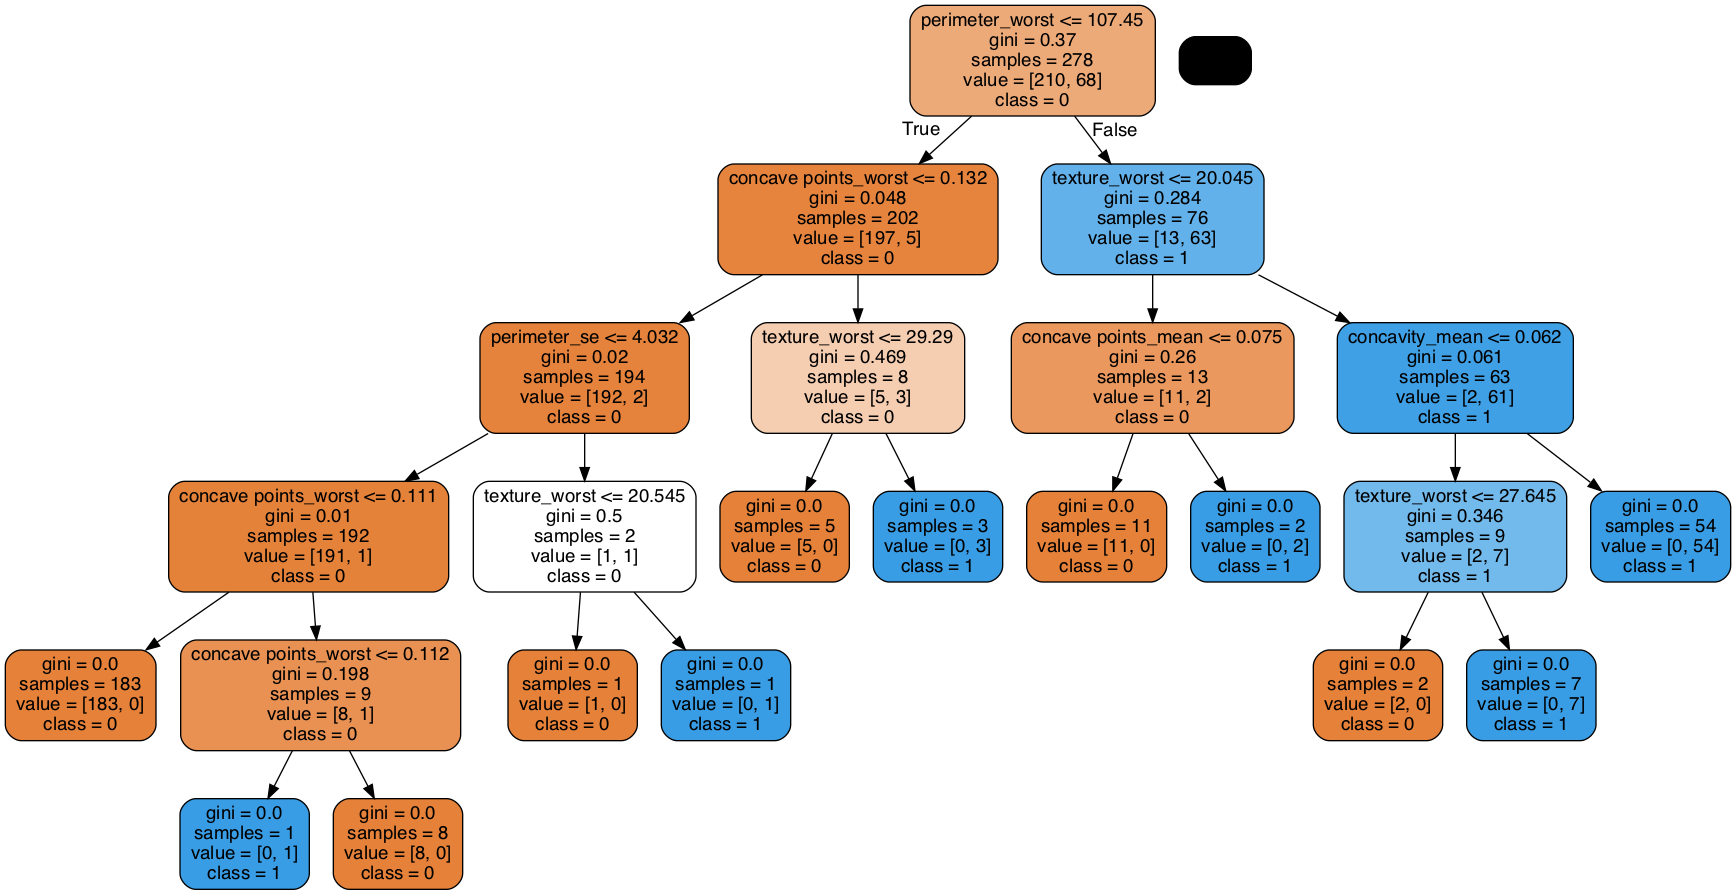

<Figure size 1152x648 with 0 Axes>

In [108]:
# Visualize decision tree model using a export_graphviz and pydotplus libraries.
plt.figure(figsize= (16,9))

features = list(X.columns)

dot_data = StringIO()  
export_graphviz(dtc, out_file = dot_data,
                feature_names=features,
                filled=True,rounded=True, 
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())


When it comes to making decisions, the decision tree is extremely helpful. It has a perimeter-worst top-level root node. Decision nodes and terminal nodes, commonly referred to as leaves, are two types of nodes. The decision tree is used to categorize breast cancer data. As a result, it is simple to comprehend even if you aren't a statistician.

In [109]:
# Create a dictionary which takes all the supervised machine learning algorithms.
dat = {'Logistic': [log_acc, log_err, log_sensitivity, log_specificity], 
       'QDA':[qda_acc, qda_err, qda_sensitivity, qda_specificity], 
        'KNN':[knn_acc, knn_err, knn_sensitivity, knn_specificity], 
        'ANN':[ann_acc, ann_err, ann_sensitivity, ann_specificity],
        'SVM':[svm_acc, svm_err, svm_sensitivity, svm_specificity],
        'Decision Trees':[decision_acc, decision_err, decision_sensitivity, 
                          decision_specificity]}

# Create a new dataframe to show algorithms.
datframe = pd.DataFrame(dat, index=['Accuracy', 'Error','Sensitivity', 'Specificity'])
datframe

Logistic        QDA        KNN        ANN        SVM  \
Accuracy     93.333000  91.667000  95.833000  90.000000  93.333000   
Error         6.667000   8.333000   4.167000  40.833000   6.667000   
Sensitivity   0.833333   0.900000   0.935484   0.966667   0.833333   
Specificity   0.966667   0.922222   0.955556   0.922222   0.966667   

             Decision Trees  
Accuracy          90.833000  
Error              9.167000  
Sensitivity        0.866667  
Specificity        0.922222

The K-nearest neighbors model outperformed other supervised machine learning models, as seen in the summary table above. However, one intriguing finding in this study was that logistic and svm performed equally well.

# Conclusion

In the summary table above, KNN is the best algorithm, contributing 96% accuracy. As per the statistical evaluation report, KNN has the best accuracy. As a result, physicians can put their trust in the algorithm’s performance. SVM and K-NN work better over QDA because their specificity is higher, indicating fewer false positives, which indicates that the patient is free of cancer. However, SVM has a lower sensitivity than KNN and QDA, making it a less credible algorithm. As a result, physicians can have confidence in the model’s accuracy and recommend a better treatment for the patient. Unfortunately, the decision tree falls short of the other leading algorithms, such as ANN, SVM, and QDA, as per statistical classification evaluation metrics results such as precision,recall and accuracy. Lastly, logistic regression performs better on binary variables, although it suffers from multi-collinearity issues among certain variables, resulting in a misclassification of the target variable (diagnosis). For the analysis of cancer disease treatment, I do not suggest logistic regression, artificial neural network and decision tree algorithm.